In [1]:
import pandas as pd
import numpy as np
import os
import requests
import zipfile
import io
import datetime 


In [ ]:
s = requests.session()
years = ['A','B','D']

for year in years:
    url3 = 'https://resources.lendingclub.com/RejectStats'+str(year)+'.csv.zip'
    file = s.get(url3)
    m=zipfile.ZipFile(io.BytesIO(file.content))
    m.extractall()


In [ ]:
years = [1,2,3,4]
for year in years:
    url3 = 'https://resources.lendingclub.com/RejectStats_2016Q'+str(year)+'.csv.zip'
    file = s.get(url3)
    m=zipfile.ZipFile(io.BytesIO(file.content))
    m.extractall()

In [2]:
declinedloans_file = [file for file in os.listdir() if file.startswith('Reject')]
declinedloans_file[:]

['RejectStatsA.csv',
 'RejectStatsB.csv',
 'RejectStatsD.csv',
 'RejectStats_2016Q1.csv',
 'RejectStats_2016Q2.csv',
 'RejectStats_2016Q3.csv',
 'RejectStats_2016Q4.csv']

In [30]:
def load_data(file):
    df = pd.read_csv(file,delimiter=',',skiprows=1)
    return df

In [104]:
df = pd.DataFrame()
for i in range(len(declinedloans_file)):
    data = load_data(declinedloans_file[i])
    
    df = df.append(data)
df.to_csv('CombinedRejectLoanStats.csv', index=None)
    

In [105]:
os.getcwd()

'C:\\Users\\antri\\antriksh'

In [106]:
df.isnull().sum()

Amount Requested              0
Application Date              0
Loan Title                  197
Risk_Score              6402779
Debt-To-Income Ratio          0
Zip Code                    291
State                        22
Employment Length             0
Policy Code                   0
dtype: int64

In [107]:
df.dtypes

Amount Requested        float64
Application Date         object
Loan Title               object
Risk_Score              float64
Debt-To-Income Ratio     object
Zip Code                 object
State                    object
Employment Length        object
Policy Code               int64
dtype: object

CHECK FOR AMOUNT REQUESTED

def validate_amount_requested(df):

    if any(df['Amount Requested'].isnull()):
        df['Amount Requested'].fillna(df['Amount Requested'].mean())
    return df
    

[FILL ALL EMPTY VALUES

In [108]:
def fill_empty_values(df):
    df['Amount Requested'].fillna(df['Amount Requested'].mean(), inplace=True)
    df['Application Date'].fillna(method='bfill', inplace=True)
    df['Loan Title'].fillna('NoValue', inplace=True)
    df['Risk_Score'].fillna(0.0, inplace=True)
    df['Zip Code'].fillna('000xx', inplace=True)
    df['Employment Length'].replace('n/a','Unknown years', inplace=True)
    df['Debt-To-Income Ratio'] = df['Debt-To-Income Ratio'].str.split('%',1).str[0]
    df['Debt-To-Income Ratio']=pd.to_numeric(df['Debt-To-Income Ratio'], errors='ignore')
   
    return df

CHECK FOR APPLICATION DATE

In [109]:
def validate_applicate_date2(df):

    for col in df1['Application Date']:
        try:
            if datetime.strptime(col, '%Y-%m-%d'):
                
                return df
            else:
                print("Null Value")### Log here
        except ValueError:
            print('Not in the right format')

CHECK FOR RISK SCORE

In [110]:
def validate_risk_score(df):
    if any(df['Risk_Score']) not in range(0,1000):
        print(" Risk Score value out of range")
    return df

CHECK STATES (REMOVE ROWS WITH EMPTY STATES)

In [111]:
def validate_states(df):
    df = df[df.State.notnull()]
    return df



CHECK ONLY REJECTED LOANS ARE THERE

In [112]:
def validate_policy_code(df):
    if any(df['Policy Code'] == 1):
         print("Wrong policy code data")
    return df

In [113]:
df = fill_empty_values(df)
#df = validate_applicate_date2(df)
df = validate_risk_score(df)
df = validate_states(df)
df = validate_policy_code(df) 

In [114]:
df.isnull().sum()

Amount Requested        0
Application Date        0
Loan Title              0
Risk_Score              0
Debt-To-Income Ratio    0
Zip Code                0
State                   0
Employment Length       0
Policy Code             0
dtype: int64

In [129]:
df['Application Date']=df['Application Date'].str[0:4]
df.head(5)

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
0,1000.0,2007,Wedding Covered but No Honeymoon,693.0,10.00,481xx,NM,4 years,0
1,1000.0,2007,Consolidating Debt,703.0,10.00,010xx,MA,< 1 year,0
2,11000.0,2007,Want to consolidate my debt,715.0,10.00,212xx,MD,1 year,0
3,6000.0,2007,waksman,698.0,38.64,017xx,MA,< 1 year,0
4,1500.0,2007,mdrigo,509.0,9.43,209xx,MD,< 1 year,0


In [ ]:
df[]

In [42]:
df.to_csv('ValidatedCombinedRejectLoan.csv', index=None)

In [116]:
df1 = pd.DataFrame()

In [123]:
df1 = df.groupby('Employment Length',as_index=False)['Risk_Score'].mean()
df1

,Employment Length,Risk_Score
0,1 year,428.119948
1,10+ years,427.007873
2,2 years,420.198242
3,3 years,417.630125
4,4 years,426.367656
5,5 years,93.460627
6,6 years,442.517626
7,7 years,445.624150
8,8 years,418.972499
9,9 years,425.398611


In [9]:
df1 = pd.DataFrame()
df1 = pd.read_csv("ValidatedCombinedRejectLoan.csv",delimiter=',', encoding="cp1252")
df1['emp_length']=pd.to_numeric(df1['emp_length'])
df1.head(2)

,Amount Requested,Application Date,Debt-To-Income Ratio,Employment Length,Loan Title,Policy Code,Risk_Score,State,Zip Code,time_stamp,emp_length,Application Year
0,1000.0,2007-05-26,10.0,4 years,Wedding Covered but No Honeymoon,0,693.0,NM,481xx,2017-04-06 20:01:15,4,2007
1,1000.0,2007-05-26,10.0,< 1 year,Consolidating Debt,0,703.0,MA,010xx,2017-04-06 20:01:15,0,2007


In [10]:
df1 = df1[df1['Application Date'] > '2013-11-05']
df1['Application Date'].value_counts()

2016-07-05    31010
2016-11-14    29586
2016-11-16    29184
2016-06-15    27127
2016-11-15    26612
2016-12-12    25749
2016-12-14    25375
2016-07-06    25347
2016-08-29    24998
2016-12-05    24625
2016-08-09    24271
2016-12-07    23620
2016-11-21    23537
2016-11-28    23448
2016-10-11    23429
2015-05-14    23298
2016-08-24    23158
2016-11-30    22950
2016-12-06    22158
2016-06-23    22114
2016-06-27    22085
2016-12-13    22047
2016-03-21    21821
2016-11-29    21750
2016-09-12    21575
2016-06-28    21372
2016-08-11    21338
2016-11-17    21199
2016-08-08    21052
2016-06-21    21029
              ...  
2013-11-07     1771
2014-12-25     1765
2013-11-08     1745
2014-11-27     1737
2013-12-24     1701
2013-12-04     1587
2014-02-02     1561
2013-11-09     1129
2013-11-10     1117
2013-12-25     1017
2013-11-19      523
2013-11-14      506
2013-11-18      455
2013-11-20      412
2013-11-21      404
2013-12-02      374
2013-12-03      371
2013-11-25      347
2013-11-26      337


In [11]:
df1['Risk_Score'].unique()

array([   0.,  747.,  632.,  663.,  681.,  616.,  654.,  647.,  716.,
        548.,  669.,  712.,  682.,  670.,  577.,  702.,  760.,  775.,
        733.,  848.,  600.,  739.,  573.,  608.,  710.,  691.,  740.,
        667.,  731.,  680.,  689.,  610.,  742.,  709.,  704.,  693.,
        653.,  650.,  746.,  706.,  660.,  635.,  755.,  613.,  668.,
        597.,  659.,  536.,  708.,  605.,  629.,  633.,  671.,  649.,
        687.,  620.,  717.,  657.,  719.,  804.,  558.,  694.,  626.,
        658.,  662.,  674.,  698.,  625.,  685.,  779.,  643.,  607.,
        884.,  692.,  642.,  652.,  583.,  581.,  596.,  592.,  656.,
        543.,  588.,  697.,  503.,  640.,  507.,  655.,  645.,  664.,
        637.,  732.,  683.,  578.,  705.,  749.,  512.,  545.,  770.,
        516.,  619.,  701.,  769.,  638.,  634.,  695.,  727.,  585.,
        778.,  690.,  508.,  547.,  561.,  554.,  501.,  980.,  673.,
        636.,  758.,  534.,  696.,  631.,  793.,  882.,  688.,  520.,
        552.,  564.,

In [12]:
df1 = df1[df1['Risk_Score'] != 0]
df1['Risk_Score'].value_counts()

501.0    83086
643.0    33275
620.0    32114
652.0    27846
651.0    26529
573.0    24795
653.0    23416
681.0    23117
663.0    22898
650.0    22546
648.0    22445
646.0    22373
649.0    22362
647.0    22342
655.0    22269
645.0    22180
659.0    22070
635.0    21990
656.0    21983
644.0    21982
660.0    21878
661.0    21776
657.0    21705
639.0    21519
654.0    21512
638.0    21404
658.0    21398
664.0    21379
662.0    21333
637.0    21284
         ...  
313.0        5
322.0        5
308.0        5
324.0        5
325.0        5
392.0        5
374.0        5
985.0        5
321.0        5
311.0        4
332.0        4
323.0        4
314.0        4
304.0        4
988.0        3
989.0        3
318.0        3
317.0        3
312.0        3
307.0        3
306.0        3
305.0        3
302.0        3
984.0        3
303.0        2
301.0        2
327.0        2
319.0        2
310.0        1
979.0        1
Name: Risk_Score, dtype: int64

In [15]:
df2= pd.DataFrame()
df2 = df1.groupby(['Risk_Score','Application Date'],as_index=False).sum()
df2 = df3.groupby('addr_state',as_index=False)['loan_status_bol','int_rate','dti','annual_inc'].mean()
df2

,Risk_Score,Application Date,Amount Requested,Debt-To-Income Ratio,Policy Code,emp_length,Application Year
0,300.0,2014-01-23,7000.0,9.84,0,0,2014
1,300.0,2014-01-27,8000.0,1.33,0,0,2014
2,300.0,2014-02-19,1000.0,287.97,0,0,2014
3,300.0,2014-02-20,25000.0,9.60,0,0,2014
4,300.0,2014-03-03,4000.0,11.28,0,0,2014
5,300.0,2014-03-13,3000.0,2.20,0,0,2014
6,300.0,2014-03-24,1000.0,1.73,0,0,2014
7,300.0,2014-03-27,4500.0,13.00,0,0,4028
8,300.0,2014-03-30,1000.0,2.30,0,0,2014
9,300.0,2014-04-06,23575.0,8.40,0,0,2014


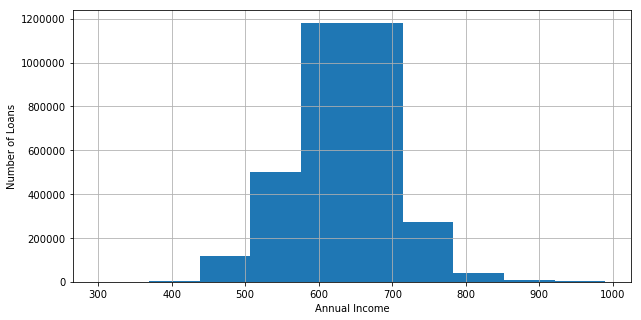

In [25]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,5))
%matplotlib inline

df2.Risk_Score.hist(figsize=(10,5))
plt.ylabel('Number of Loans')
plt.xlabel('Annual Income')

In [26]:
df2 = df2[df2['Risk_Score'] > 500]

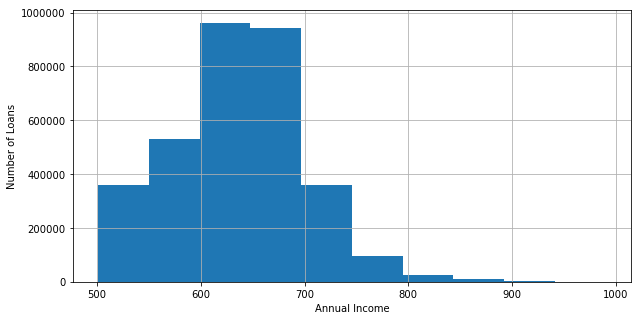

In [27]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,5))
%matplotlib inline

df2.Risk_Score.hist(figsize=(10,5))
plt.ylabel('Number of Loans')
plt.xlabel('Annual Income')

In [23]:
df2[df2['Risk_Score'] == 990]

,Risk_Score,Application Date,Amount Requested,Debt-To-Income Ratio,Policy Code,emp_length,Application Year
311820,990.0,2013-11-20,35000.0,2.02,0,2,2013
311821,990.0,2013-11-21,1000.0,26.19,0,-1,2013
311822,990.0,2013-12-03,1500.0,0.00,0,-1,2013
311823,990.0,2013-12-04,15000.0,116.71,0,5,2013
311824,990.0,2013-12-06,17050.0,74.95,0,0,6039
311825,990.0,2013-12-07,39700.0,40.29,0,3,4026
311826,990.0,2013-12-08,10000.0,3.40,0,0,2013
311827,990.0,2013-12-09,9700.0,34.24,0,0,4026
311828,990.0,2013-12-10,24800.0,23.69,0,0,6039
311829,990.0,2013-12-11,27000.0,11.88,0,0,4026


In [6]:
df1['loan_status'] = 0
df1.head(3)

,Amount Requested,Application Date,Debt-To-Income Ratio,Employment Length,Loan Title,Policy Code,Risk_Score,State,Zip Code,time_stamp,emp_length,Application Year,loan_status
0,1000.0,2007-05-26,10.0,4 years,Wedding Covered but No Honeymoon,0,693.0,NM,481xx,2017-04-06 20:01:15,4,2007,0
1,1000.0,2007-05-26,10.0,< 1 year,Consolidating Debt,0,703.0,MA,010xx,2017-04-06 20:01:15,0,2007,0
2,11000.0,2007-05-27,10.0,1 year,Want to consolidate my debt,0,715.0,MD,212xx,2017-04-06 20:01:15,1,2007,0


In [24]:
df2 = pd.DataFrame()
df2 = df1[['Amount Requested','Application Year','Debt-To-Income Ratio','Risk_Score','State','emp_length','Employment Length']]
df2.head(3)
df2.to_csv("AnalysisDeclined.csv", index= None)


KeyboardInterrupt: 

In [11]:
df2['Employment Length'].value_counts()

< 1 year     8859730
5 years      1231010
n/a           354865
10+ years     231310
2 years        82460
1 year         70814
3 years        70121
4 years        51638
6 years        38240
7 years        32513
8 years        32326
9 years        24337
Name: Employment Length, dtype: int64

In [41]:
df3 = pd.DataFrame()
df3 = df1.groupby( [ "Application Year"] ).size().to_frame(name = 'count').reset_index()
df3

,Application Year,count
0,2007,5274
1,2008,25575
2,2009,56991
3,2010,112561
4,2011,217792
5,2012,337277
6,2013,760942
7,2014,1933700
8,2015,2859379
9,2016,4769873


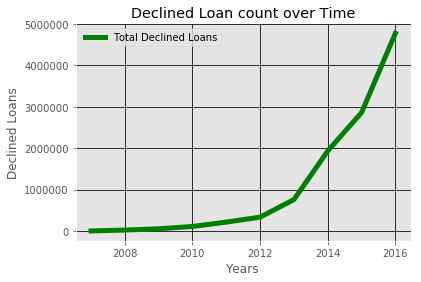

In [42]:
from matplotlib import pyplot as plt
from matplotlib import style
#rcParams['figure.figsize']=10,5

style.use('ggplot')

x = df3['Application Year']
y = df3['count']




plt.plot(x,y,'g',label='Total Declined Loans', linewidth=5)


plt.title('Declined Loan count over Time')
plt.ylabel('Declined Loans')
plt.xlabel('Years')

plt.legend()
#plt.xticks(np.arange(min(x), max(x)+1, 2.0))
plt.grid(True,color='k')

plt.show()

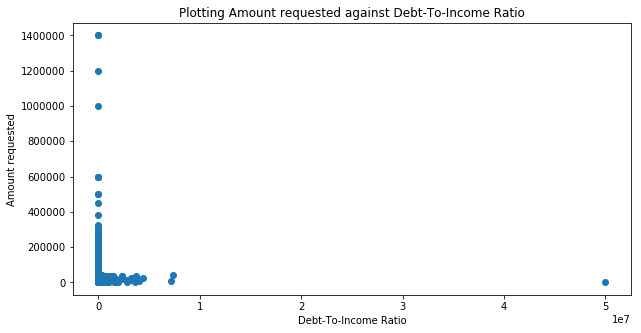

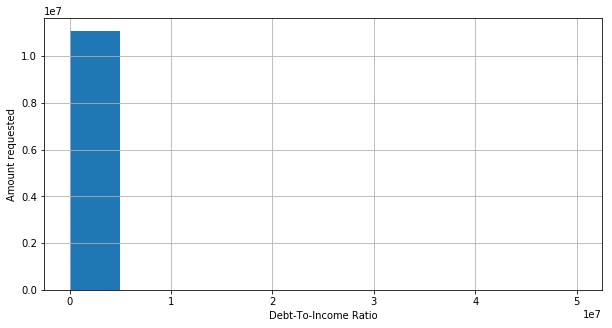

In [40]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,5))
plt.scatter(df1['Debt-To-Income Ratio'], df1['Amount Requested'])
plt.title("Plotting Amount requested against Debt-To-Income Ratio")
plt.ylabel('Amount requested')
plt.xlabel('Debt-To-Income Ratio')
plt.show()

df1['Debt-To-Income Ratio'].hist(figsize=(10,5))
plt.ylabel('Amount requested')
plt.xlabel('Debt-To-Income Ratio')

In [36]:
df1 = df1.groupby('emp_length',as_index=False)['Debt-To-Income Ratio','Amount Requested','Risk_Score'].mean()
df1.drop(0, inplace=True)
df1

,emp_length,Debt-To-Income Ratio,Amount Requested,Risk_Score
1,0,202.102817,13497.555791,279.117153
2,1,472.121296,13195.067646,428.119948
3,2,530.984838,14007.764337,420.198242
4,3,471.109204,14559.429140,417.630125
5,4,373.889332,14636.341559,426.367656
6,5,63.481089,11996.756181,93.460627
7,6,343.888610,15236.057318,442.517626
8,7,362.329835,15808.991561,445.624150
9,8,348.032573,15937.812339,418.972499
10,9,309.028242,15400.509117,425.398611


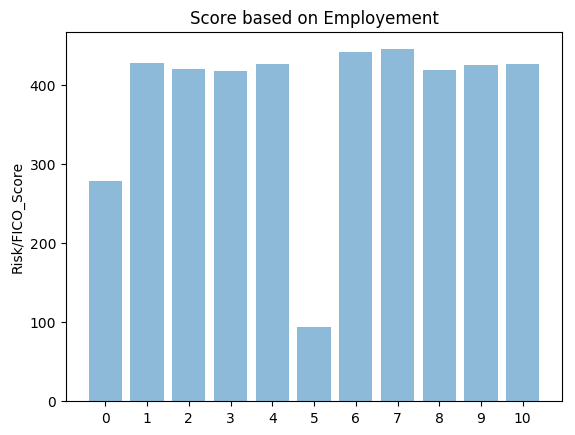

In [37]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
#rcParams['figure.figsize']=10,5
 
objects = df1['emp_length']
y_pos = np.arange(len(objects))
performance = df1['Risk_Score']
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Risk/FICO_Score')
plt.title('Score based on Employement')
 
plt.show()

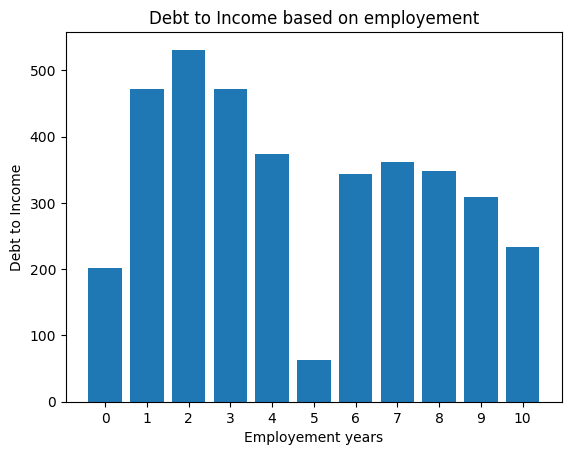

In [22]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
#rcParams['figure.figsize']=10,5
 
objects = df1['emp_length']
y_pos = np.arange(len(objects))
performance = df1['Debt-To-Income Ratio']
 
plt.bar(y_pos, performance, align='center', alpha=1.0)
plt.xticks(y_pos, objects)
plt.ylabel('Debt to Income')
plt.xlabel('Employement years')
plt.title('Debt to Income based on employement')
 
plt.show()

In [134]:
df1.head(2)

,Application Date,Amount Requested,Risk_Score,Debt-To-Income Ratio
0,2007,8547.615013,539.419416,1151.718447
1,2008,8612.787788,516.151515,1773.825622


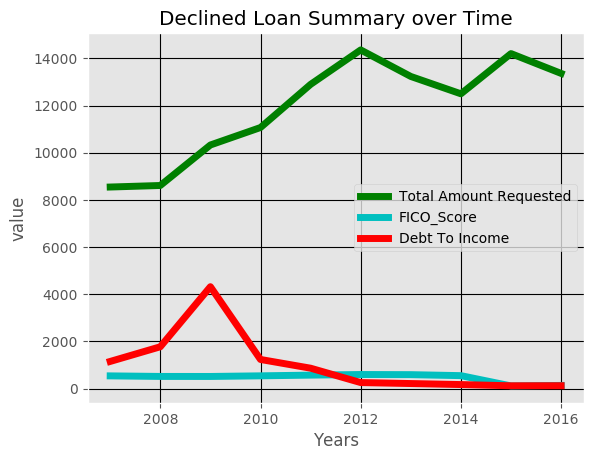

In [141]:
from matplotlib import pyplot as plt
from matplotlib import style
#rcParams['figure.figsize']=10,5

style.use('ggplot')

x = df1['Application Date']
y = df1['Amount Requested']

x2 = df1['Application Date']
y2 = df1['Risk_Score']

x3 = df1['Application Date']
y3 = df1['Debt-To-Income Ratio']


plt.plot(x,y,'g',label='Total Amount Requested', linewidth=5)
plt.plot(x2,y2,'c',label='FICO_Score',linewidth=5)
plt.plot(x3,y3,'r',label='Debt To Income',linewidth=5)

plt.title('Declined Loan Summary over Time')
plt.ylabel('value')
plt.xlabel('Years')

plt.legend()
#plt.xticks(np.arange(min(x), max(x)+1, 2.0))
plt.grid(True,color='k')

plt.show()

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,5))
%matplotlib inline

df.meanfico.hist(figsize=(10,5))
plt.ylabel('Number of Loans')
plt.xlabel('Annual Income')